线性回归
1. 线性模型可以看做是单层神经网络
2. 训练流程
    2.1. 模型确定
    2.2. 训练数据选取
    2.3. 超参数设置（含loss、损失函数、）
    2.4. 训练+训练效果
3. 线性回归有显示解


优化：
1. 梯度下降: 自动选择不同的初始值，迭代选梯度最大的方向
    1.1 学习率 == 步长 ： 不能太大也不能太小
    1.2 批大小 （小批量随机下降）： 随机采样b个样本估计整体样本损失的近似估计


In [141]:
import random
import torch
from d2l import torch as d2l

In [142]:
def synthetic_data(w, b, num_example):    #人造数据集
    x = torch.normal(0, 1, (num_example, len(w))) #size = num_example * len(w)
                                                    # 因为x要与w相乘，w大小为2 * 1 * 样本数
                                                    # 所以x大小应为样本数 * len
    y = torch.matmul(x, w)+b #y关于x的表达式
    y+= torch.normal(0, 0.01, y.shape) #这一步是给y加入一个随机噪音
    return x, y.reshape((-1, 1)) #返回x， y的列向量

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [143]:
print('features:', features[0], '\nlabel:', labels[0]) #看一下样本长什么样

features: tensor([-0.4012,  1.9334]) 
label: tensor([-3.1762])


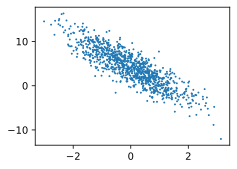

In [144]:
d2l.set_figsize() #labels里面是一维标量标签， features里面是二维数据样本
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

In [145]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) #生成样本下标（有点给样本排序的感觉）
    random.shuffle(indices)             #打乱样本（下标）
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]  #重复返回值， 与return类似但是return是返回后停止
                                                                # yield会在返回值后继续迭代继续返回

batch_size = 10

for x,y in data_iter(batch_size, features, labels):
    print(x, '\n' , y)      #x 10*2，y 10*1
    break


tensor([[ 1.5417, -0.9432],
        [-0.3568,  1.8213],
        [ 0.7048, -1.2872],
        [-1.5598, -1.2630],
        [-0.7569, -0.4227],
        [ 0.6226, -0.8255],
        [ 0.0184, -0.8869],
        [ 0.4403, -0.8389],
        [-0.3581, -0.7496],
        [-1.4624,  0.8311]]) 
 tensor([[10.4941],
        [-2.7147],
        [ 9.9730],
        [ 5.3654],
        [ 4.1182],
        [ 8.2498],
        [ 7.2542],
        [ 7.9407],
        [ 6.0306],
        [-1.5495]])


In [146]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)   #模型初始化
b = torch.zeros(1, requires_grad=True)

def linreg(x, w, b):
    return torch.matmul(x, w) + b

In [147]:
def squared_loss(y_hat, y): #损失函数，均方差
    return (y_hat - y.reshape(y_hat.shape))**2/2


def sgd(params,lr,batch_size):  #优化算法
    with torch.no_grad(): #计算到这里时不会继续去计算梯度
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [148]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y)

        l.sum().backward()
        sgd([w, b], lr, batch_size)
        
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epcho {epoch+1}, loss {float(train_l.mean()):f}') 

epcho 1, loss 0.032745
epcho 2, loss 0.000121
epcho 3, loss 0.000055


超参数：lr /epcho/ lossfunc等会对结果造成很大的影响 